# Analisis Data Zuber

Analisis preferensi penumpang dan faktor eksternal dalam perjalanan ride-sharing untuk Zuber di Chicago dengan mempelajari data kompetitor dan menguji hipotesis tentang pengaruh cuaca terhadap frekuensi perjalanan.

## Daftar Isi

* [Tujuan](#)
* [Hipotesis](#)
* [Tahapan](#)
* [1. Analisis Data Exploratif (EDA)](#)
    * [1.1 Memuat Data](#)
    * [1.2. Mengeksplorasi Data Awal](#)
    * [1.3. Mempelajari Parameter Inti](#)
* [2. Analisis Data Statistik (Hypothesis Testing](#)
    * [2.1. Mengeksplorasi Data Perjalanan dari Loop ke Bandara Internasional O'Here](#)
    * [2.2. Menguji Hipotesis](#)
* [Kesimpulan Umum](#)
    * [A. Analisis Data Eksploratif (EDA)](#)
    * [B. Analisis Data Statistik (Hypothesis Testing](#)

## Tujuan

Dalam proyek ini, fokus diberikan pada analisis data perusahaan taksi. Data sebelumnya telah melalui tahap pre-processing untuk membersihkan dan merapikan data agar siap untuk diolah. Pengolahan data dilakukan menggunakan SQL. Tahap selanjutnya adalah Exploratory Data Analysis (EDA) dan Data Visualization untuk mengungkap wawasan dari data tersebut. Terakhir, dilakukan analisis data statistik untuk Hypothesis Testing.

## Hipotesis
1. Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare mengalami perubahan saat terjadi hujan pada hari Sabtu.

## Tahapan

Data tentang hasil SQL disimpan dalam file:

* `/datasets/project_sql_result_01.csv`
* `/datasets/project_sql_result_04.csv`
* `/datasets/project_sql_result_07.csv`

Proyek ini terdiri dari dua tahap:

1. Analisis Data Exploratif (EDA)
2. Analisis Data Statistik (Hyphothesis Testing)

## 1. Analisis Data Exploratif (EDA)

**Import library yang dibutuhkan:**

In [1]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

### 1.1. Memuat Data

In [2]:
# Try and except datasets
try:
    company_data = pd.read_csv('moved_project_sql_result_01.csv')
    dropoff_data = pd.read_csv('moved_project_sql_result_04.csv')
    travel_data = pd.read_csv('moved_project_sql_result_07.csv')
except:
    company_data = pd.read_csv('/datasets/project_sql_result_01.csv')
    dropoff_data = pd.read_csv('/datasets/project_sql_result_04.csv')
    travel_data = pd.read_csv('/datasets/project_sql_result_07.csv')

### 1.2. Mengeksplorasi Data Awal

**Data Perusahaan**

In [3]:
company_data

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


**Deskripsi company_data:**

* `company_name` — nama perusahaan taksi
* `trips_amount` — Jumlah perjalanan untuk setiap perusahaan taksi pada tanggal 15-16 November 2017 akan dianalisis dan dihitung.

In [4]:
# Check data info
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
# Check statistics data
company_data.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


**Data Dropoff Location**

In [6]:
dropoff_data

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


**Deskripsi dropoff_data:**

* `dropoff_location_name` — nama wilayah di Chicago tempat perjalanan berakhir
* `average_trips` — Jumlah rata-rata perjalanan yang berakhir di setiap wilayah di Chicago pada bulan November 2017 akan dihitung dan dianalisis.

In [7]:
# Check data info
dropoff_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [8]:
# Check statistics data
dropoff_data.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [9]:
# Check duplicated data
dropoff_data.duplicated().sum()

0

### 1.3. Mempelajari Parameter Inti

**Identifikasi 10 wilayah teratas**

In [10]:
top_ten = dropoff_data.sort_values(by='average_trips', ascending=False).head(10)
top_ten

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


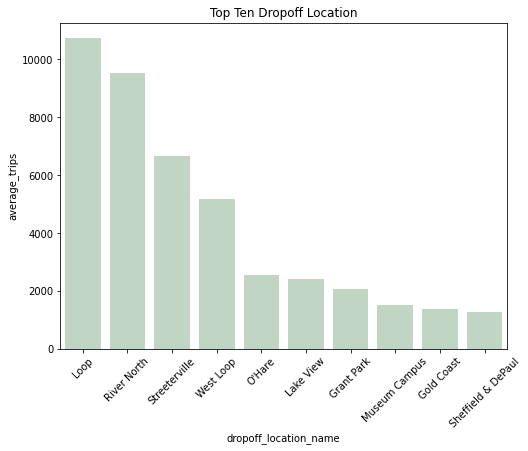

In [11]:
# Create a bar plot
plt.figure(figsize=(8,6))
plt.xticks(rotation=45)
sns.barplot(x="dropoff_location_name", y="average_trips", data=top_ten, color='#BCD8C1')
plt.title('Top Ten Dropoff Location')
plt.show()

**Kesimpulan sementara:*

* Sepuluh dropoff location yang memiliki rata-rata perjalanan tertinggi yaitu di lokasi Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, dan Sheffield & DePaul.

**Grafik Perusahaan Taksi**

In [12]:
company_data.head(20)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


* Untuk memudahkan analisis, hanya perusahaan dengan jumlah perjalanan di atas 5000 yang akan dipertimbangkan.

In [13]:
top_company = company_data.sort_values(by='trips_amount', ascending=False).head(11)

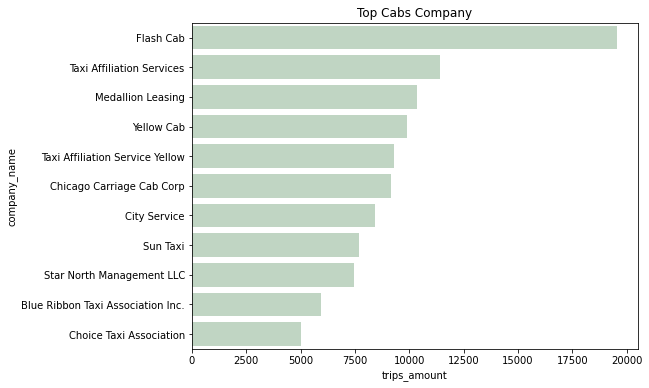

In [14]:
# Create a bar plot
plt.figure(figsize=(8,6))
sns.barplot(x="trips_amount", y="company_name", data=top_company, color='#BCD8C1')
plt.title('Top Cabs Company')
plt.show()

**Kesimpulan:**

* Perusahaan-perusahaan teratas dalam jumlah perjalanan adalah Flash Cab dengan 19558 perjalanan, Taxi Affiliation Services dengan 11422 perjalanan, Medallion Leasing dengan 10367 perjalanan, dan Yellow Cab dengan 9888 perjalanan.

## 2. Analisis Data Statistik (Hypothesis Testing)

### 2.1. Mengeksplorasi Data Perjalanan dari Loop ke Bandara Internasional O'Hare

**Hipotesis:**

**Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare mengalami perubahan pada hari Sabtu ketika terjadi hujan.**

Sebelum melakukan pengujian, perlu dilakukan pencarian data yang mendukung hipotesis tersebut.

In [15]:
travel_data

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


**Deskripsi travel_data:**

* `start_ts` — tanggal dan waktu penjemputan
* `weather_conditions` — kondisi cuaca saat perjalanan dimulai
* `duration_seconds` — durasi perjalanan dalam satuan detik

In [16]:
travel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Data pada kolom start_ts akan diubah menjadi format datetime, dan beberapa kolom baru akan ditambahkan untuk analisis lebih lanjut.

In [17]:
# Cast 'start_ts' column to datetime
travel_data['start_ts'] = pd.to_datetime(travel_data['start_ts'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
travel_data['start_date'] = travel_data['start_ts'].dt.date
travel_data['start_time'] = travel_data['start_ts'].dt.time
travel_data['start_day'] = travel_data['start_ts'].dt.day_name()

In [18]:
travel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
 3   start_date          1068 non-null   object        
 4   start_time          1068 non-null   object        
 5   start_day           1068 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 50.2+ KB


In [19]:
#creates slice for the weather condition that "Good" 
good_weather = travel_data.query('weather_conditions == "Good"')

In [20]:
#creates slice for the weather condition that "Bad" 
bad_weather = travel_data.query('weather_conditions == "Bad"')

In [21]:
travel_data

,start_ts,weather_conditions,duration_seconds,start_date,start_time,start_day
0,2017-11-25 16:00:00,Good,2410.0,2017-11-25,16:00:00,Saturday
1,2017-11-25 14:00:00,Good,1920.0,2017-11-25,14:00:00,Saturday
2,2017-11-25 12:00:00,Good,1543.0,2017-11-25,12:00:00,Saturday
3,2017-11-04 10:00:00,Good,2512.0,2017-11-04,10:00:00,Saturday
4,2017-11-11 07:00:00,Good,1440.0,2017-11-11,07:00:00,Saturday
...,...,...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,2017-11-25,11:00:00,Saturday
1064,2017-11-11 10:00:00,Good,1318.0,2017-11-11,10:00:00,Saturday
1065,2017-11-11 13:00:00,Good,2100.0,2017-11-11,13:00:00,Saturday
1066,2017-11-11 08:00:00,Good,1380.0,2017-11-11,08:00:00,Saturday


### 2.2. Menguji Hipotesis

**Hipotesis:**

**Analisis menunjukkan bahwa terdapat perubahan dalam durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare pada hari Sabtu yang mengalami cuaca hujan.**

Dalam uji variansi, jika rasio sampel menunjukkan varians yang lebih besar dibandingkan dengan sampel lainnya dengan varians yang lebih kecil (<4), kita dapat berasumsi bahwa kedua varians setara. Alternatifnya, kita dapat menggunakan uji Levene yang memiliki hipotesis nol (H0) bahwa kedua grup memiliki varians yang setara, dan hipotesis alternatif (H1) bahwa kedua grup memiliki varians yang berbeda. Jika hasil uji Levene menunjukkan nilai p-value yang lebih kecil dari nilai kritis (alpha), maka kita dapat menolak H0; sebaliknya, jika nilainya lebih besar, maka H0 diterima.

In [22]:
# Create a sample for levene test
sample_1 = good_weather['duration_seconds']
sample_2 = bad_weather['duration_seconds']

In [23]:
# Levene test
st.levene(sample_1, sample_2)

LeveneResult(statistic=0.38853489683656073, pvalue=0.5332038671974493)

Dikarenakan nilai p-value lebih besar dari nilai kritis (alpha = 0.05), kita tidak dapat menolak hipotesis nol (H0). Oleh karena itu, kedua sampel dianggap memiliki varians yang sama (equal_var = True).

* Hipotesis nol (H0) menyatakan bahwa durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare sama pada hari Sabtu yang mengalami cuaca hujan.
* Hipotesis alternatif (H1) menyatakan bahwa durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari Sabtu yang mengalami cuaca hujan.

In [24]:
# ttest_ind for sample 1 and 2
alpha = 0.05

results = st.ttest_ind(sample_1, sample_2, equal_var=True)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value:  6.517970327099473e-12
Kita menolak hipotesis nol


**Kesimpulan:**

* Hasil dari uji hipotesis menunjukkan bahwa durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare memang berubah pada hari Sabtu yang mengalami cuaca hujan.

## Kesimpulan Umum

### A. Analisis Data Esksploratif (EDA)

Dari hasil analisis data esksploratif, dapat disimpulkan bahwa:

1. Data telah melewati tahap pra-pemrosesan dengan menggunakan SQL, sehingga data yang diperoleh sudah dalam kondisi yang bersih dan terstruktur dengan baik.
2. Wilayah-wilayah dengan rata-rata perjalanan tertinggi adalah Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, dan Sheffield & DePaul.
3. Perusahaan taksi dengan jumlah perjalanan terbanyak adalah Flash Cab, diikuti oleh Taxi Affiliation Services dan Medallion Leasin.

### B. Analisis Data Statistik (Hypothesis Testing)

Dari hasil analisis pengujian hipotesis, dapat disimpulkan bahwa:

1. Hipotesis yang diuji, yaitu bahwa durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari Sabtu yang hujan, terbukti benar berdasarkan hasil analisis.